In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
def Q_factor_to_dataframe(dfin, tan_ma, tan_ms, tan_sa, tan_substrate):
    df = dfin.copy()
    df['1/Q_MA_fixed'] = df['p_MA_fixed']*tan_ma
    df['1/Q_MS_fixed'] = df['p_MS_fixed']*tan_ms
    df['1/Q_SA_fixed'] = df['p_SA_fixed']*tan_sa
    df['1/Q_substrate_fixed'] = df['p_substrate_fixed']*tan_substrate
    df['1/Q'] = df['1/Q_MA_fixed'] + df['1/Q_MS_fixed'] + df['1/Q_SA_fixed'] + df['1/Q_substrate_fixed']
    df['Q_MA_fixed'] = 1./df['1/Q_MA_fixed']
    df['Q_MS_fixed'] = 1./df['1/Q_MS_fixed']
    df['Q_SA_fixed'] = 1./df['1/Q_SA_fixed']
    df['Q_substrate_fixed'] = 1./df['1/Q_substrate_fixed']
    df['Q'] = 1./df['1/Q']
    df['tan_ma']=tan_ma
    df['tan_ms']=tan_ms
    df['tan_sa']=tan_sa
    df['tan_substrate']=tan_substrate
    return df

In [111]:
def get_region_group_participation(df_bar, regions, group):
    return df_bar[[f"p_{group}_{reg.replace(' ','_')}_fixed"
                   if "nonmer" not in reg else
                                          f"p_{group}_{reg.replace(' ','_')}" for reg in regions]].values


def plot_participation(df_bar, if_groups=None, vol_groups=None, regions=None):
    if if_groups is None:
        if_groups = ['MA', 'SA', 'MS']
    if vol_groups is None:
        vol_groups = ['substrate', 'vacuum']
    if regions is None:
        regions = ['wire', 'gap', 'default']
       
    max_y = [0.00035, 1]
   
    fig, ax = plt.subplots(1,2,figsize=(10,4))


    regions_tmp = [f"{region} mer" for region in regions] + [f"{region} nonmer" for region in regions]
    regions = regions_tmp
   
    region_interface_participations = {group: get_region_group_participation(df_bar, regions, group) for group in if_groups}
    region_volume_participations = {group: get_region_group_participation(df_bar, regions, group) for group in vol_groups}
   
    width = 0.4
    bottom = np.zeros(len(regions))
   
    for boolean, region_participation in region_interface_participations.items():
        p = ax[0].bar(regions, region_participation, width, label=boolean, bottom=bottom)
        bottom = np.add(bottom, region_participation, casting='unsafe')
   
    ax[0].set_title(f"{df_bar.key} participation in different regions")
    ax[0].set_xticks(range(len(regions)), regions, rotation=45),
    ax[0].legend(loc="upper right")
    ax[0].set_ylim([0, max_y[0]])
    ax[0].set_ylabel("participation")
    bottom = np.zeros(len(regions))
    for boolean, region_participation in region_volume_participations.items():
        p = ax[1].bar(regions, region_participation, width, label=boolean, bottom=bottom)
        bottom = np.add(bottom, region_participation, casting='unsafe')
   
    #ax[1].set_title("Turtlemon interface participation in different regions")
    ax[1].set_xticks(range(len(regions)), regions, rotation=45),
    ax[1].legend(loc="upper left")
    ax[1].set_ylim([0, max_y[1]])
    ax[1].set_ylabel("participation")
    plt.show()

In [112]:


def plot_losses(df_bar, groups=None, regions=None):
    cols=3
    fig, ax = plt.subplots(int(len(case_strs)/cols),cols,figsize=(5*cols,4*int(len(case_strs)/cols)))
    if groups is None:
        groups = ['MA', 'SA', 'MS', 'substrate']
    if regions is None:
        regions = ['wire', 'gap', 'default']
    regions_tmp = [f"{region} mer" for region in regions] + [f"{region} nonmer" for region in regions]
    regions = regions_tmp
   
    for i_tan, case_str in enumerate(case_strs):
        tan_ma, tan_ms, tan_sa, tan_substrate = ma_vals[i_tan], ms_vals[i_tan], sa_vals[i_tan], substrate_vals[i_tan]
        loss_tangents = {
            'MA':tan_ma,
            'MS':tan_ms,
            'SA':tan_sa,
            'substrate':tan_substrate,
        }
        region_interface_participations = {group: get_region_group_participation(df_bar, regions, group)*loss_tangents[group] for group in groups}
        width = 0.4
        max_y = 1.6e-6
        bottom = np.zeros(len(regions))
   
        for boolean, region_participation in region_interface_participations.items():
            p = ax[int(i_tan/3.)][i_tan%cols].bar(regions, region_participation, width, label=boolean, bottom=bottom)
            bottom = np.add(bottom, region_participation, casting='unsafe')
            ax[int(i_tan/3.)][i_tan%cols].set_title(f"case {i_tan}")
        ax[int(i_tan/3.)][i_tan%cols].legend(loc="upper right")
        ax[int(i_tan/3.)][i_tan%cols].set_ylim((0,max_y))
        ax[int(i_tan/3.)][i_tan%cols].set_xticks(range(len(regions)), regions, rotation=15)
        plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.2)
            
    plt.show()

In [113]:
eigenmode_paths=[
    'clockmon_eigenmode_epr.csv',
    'double_pads_eigenmode_epr.csv'
]
names = [
    'Clockmon',
    'doublepad'
]


i_tan = 8
# case itan


In [114]:
# case 0: Niko's Thesis
# case 1: Nb-Si copy of https://arxiv.org/abs/2012.10761
# case 2: same as previous, but pessimistic substrate from https://arxiv.org/abs/2211.16437
# case 3: TiN-SI copy of https://arxiv.org/abs/2211.16437
# case 4: TiN-SI with better substrate as 1st
# case 5: "fit M149" [2963e-6 0 2004e-6 6.3e-07] https://gitlab.iqm.fi/sd/sample-design-calculations/-/blob/master/masks/M149/QFA_QFB_resonator_readout_measurements.ipynb
# case 6: "fit M149 M169 M176 M181 [5929e-6 0 741e-6 7.1e-07] https://gitlab.iqm.fi/sd/sample-design-calculations/-/blob/master/masks/M149/QFA_QFB_resonator_readout_measurements.ipynb
# case 7: "best hypothesis: MA and MS dominate": [6000e-6, 5500e-6, 0, 0.30e-6] https://gitlab.iqm.fi/sd/sample-design-calculations/-/blob/master/masks/M149/QFA_QFB_resonator_readout_measurements.ipynb
# case 8: "best hypothesis: MA and SA dominate": [6000e-6, 0, 1500e-6, 0.30e-6] https://gitlab.iqm.fi/sd/sample-design-calculations/-/blob/master/masks/M149/QFA_QFB_resonator_readout_measurements.ipynb


case_strs = [
    "case 0: Niko's Thesis",
    'case 1: Nb-Si https://arxiv.org/abs/2012.10761',
    'case 2: Pessimistic substrate https://arxiv.org/abs/2211.16437',
    'case 3: TiN-SI https://arxiv.org/abs/2211.16437',
    'case 4: TiN-SI with better substrate',
    'case 5: Fit M149: QFA, QFB',
    'case 6: Fit M149 M169 M176 M181: QFA, QFB',
    'case 7: Best hypothesis QFA, QFB: MA and MS dominate',
    'case 8: Best hypothesis QFA, QFB: MA and SA dominate',
]
   


In [115]:
ma_vals = [9.9e-3, 9.9e-3, 9.9e-3, 3.5e-3, 3.5e-3, 2963e-6, 5929e-6, 6e-3, 6e-3]
ms_vals = [2.6e-3, 3.5e-4, 3.5e-4, 2.7e-4, 2.7e-4, 0, 0, 5.5e-3, 0]
sa_vals = [2.1e-3, 1.7e-3, 1.7e-3, 1.0e-3, 1.0e-3, 2004e-6, 741e-6, 0, 1.5e-3]
substrate_vals = [5e-7, 1.3e-7, 2.8e-7, 2.8e-7, 1.3e-7, 6.3e-7, 7.1e-7, 3e-7, 3e-7]
case_names = [f"ms:{ms}, ma:{ma}, sa:{sa}, substrate:{substrate}"
              for ms, ma, sa, substrate in zip(ms_vals, ma_vals, sa_vals, substrate_vals)]


dfs = []
for i_tan in range(len(ma_vals)):
    for epath in eigenmode_paths:
        df = pd.read_csv(epath)
        df['case']=df.index*0+i_tan
        dfs.append(Q_factor_to_dataframe(df, ma_vals[i_tan], ms_vals[i_tan], sa_vals[i_tan], substrate_vals[i_tan]))

df = pd.concat(dfs)

In [116]:
f = 4.2e9
omega = 2.*np.pi*f
df['T1 at 4.2 GHz']=df['Q']/omega*1e6

In [117]:
df['T1 at 4.2 GHz']

0     44.491204
0     48.378011
0     82.810491
0     95.199539
0     63.641436
0     70.709631
0     95.302292
0    101.545902
0    145.864907
0    161.039132
0     50.683255
0     52.720778
0     45.178501
0     47.020544
0     73.352352
0     79.839943
0     75.941818
0     82.397252
Name: T1 at 4.2 GHz, dtype: float64

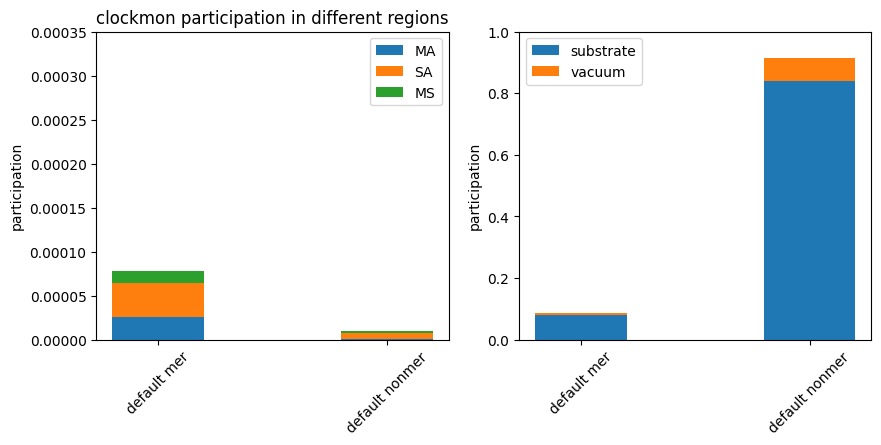

In [118]:
plot_participation(df.iloc[0], regions = ['default']) # select one of the turtlemon simulations
# plot_participation(df.iloc[3]) # select the other of the turtlemon simulations
# plot_losses(df.iloc[9]) # select one of the turtlemon simulations (t01_min_roe)

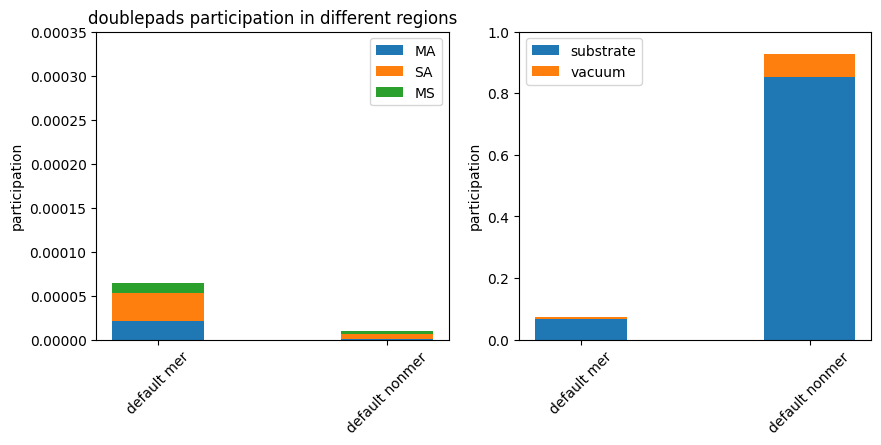

In [119]:
plot_participation(df.iloc[1], regions = ['default']) # select one of the turtlemon simulations


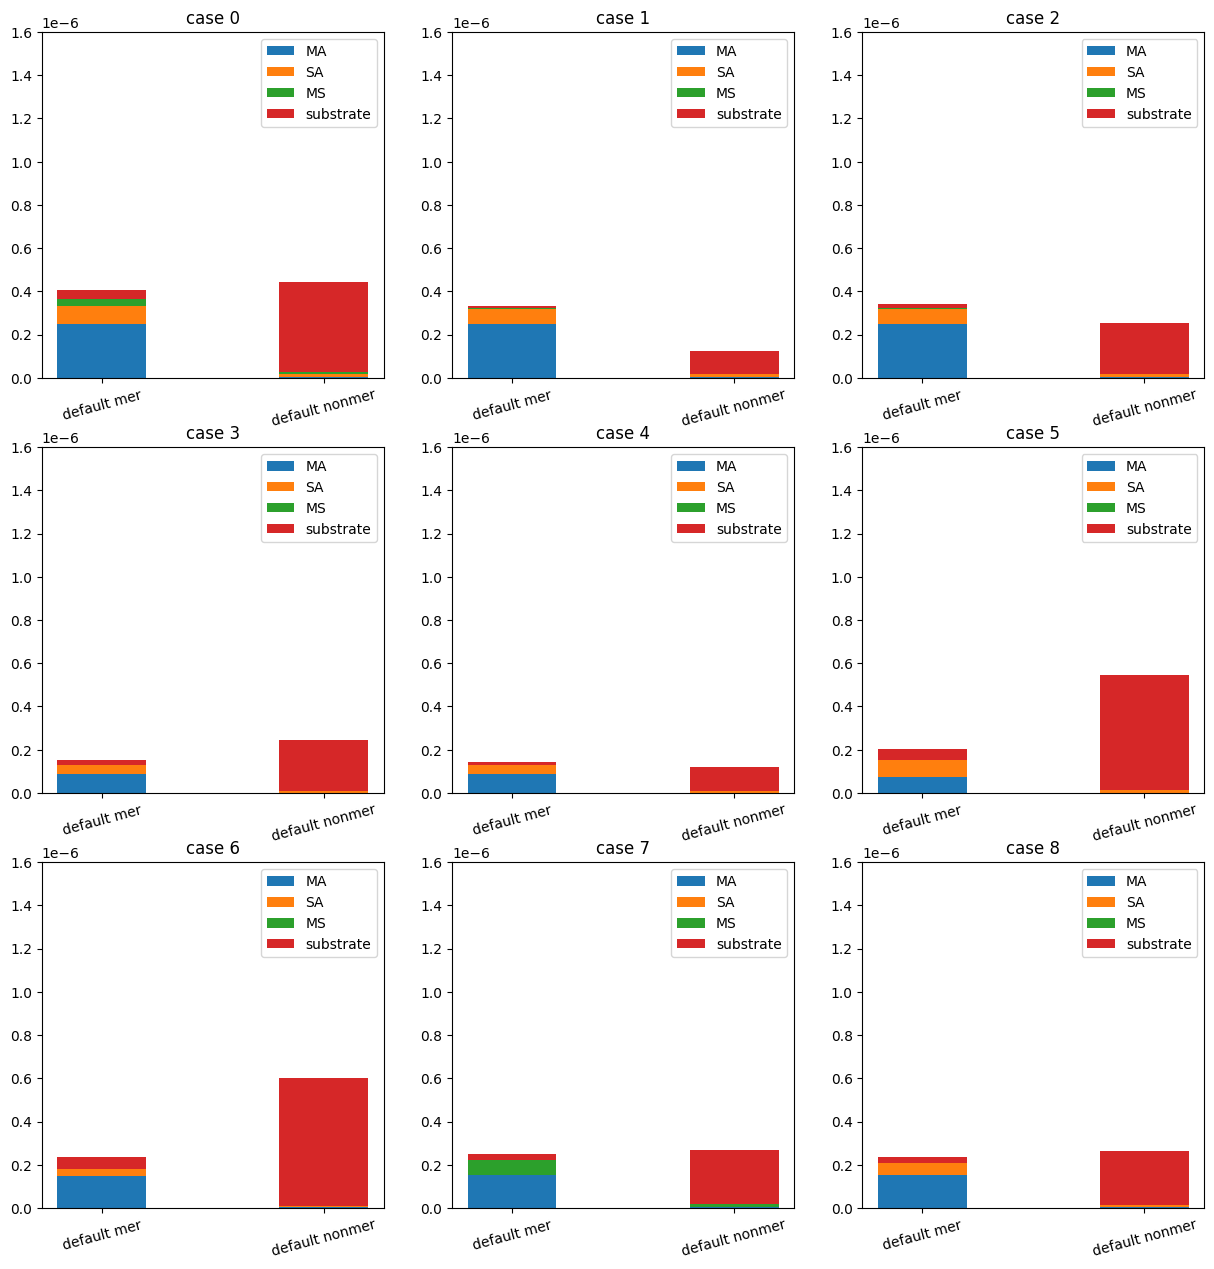

In [120]:
plot_losses(df.iloc[0], regions = ['default']) # select one of the turtlemon simulations (t01_min_roe)